#SECCIÓN 3

##### DANIELA JIJON
##### LUCIANA VALDIVIESO
##### JUAN FRANCISCO CISNEROS

### IMPORTACIONES Y LIBRERIAS

In [ ]:
pip install stemgraphic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import stemgraphic
import matplotlib.pyplot as plt
import math
import random 
import statsmodels.api as sm
import numpy as np
from scipy.stats import uniform,binom,norm,expon
import scipy.stats as st
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### DATOS EXCEL

In [ ]:
data = pd.read_csv('gdrive/MyDrive/PROBABILIDAD Y ESTADISTICA/PROYECTO DE EJERCICIOS/ENCUESTA.csv')
data

,ID,"Ingresa tu numero de teléfono, será utilizado únicamente para verificar tu identidad",SEXO,EDAD,COLEGIO ACADEMICO,ANO DE ESTUDIO,HORAS DE ESTUDIO SEMANALES,GPA
0,1,939683251,Masculino,20,POLI,3,18.0,3.66
1,2,982094921,Femenino,18,POLI,2,13.0,3.80
2,3,995485440,Femenino,20,POLI,3,8.0,3.33
3,4,987159953,Masculino,19,POLI,2,18.0,3.00
4,5,939603446,Femenino,19,POLI,2,2.5,3.50
...,...,...,...,...,...,...,...,...
197,198,983077934,Femenino,21,JUR,4,18.0,3.90
198,199,963981407,Masculino,20,POLI,3,8.0,2.30
199,200,995932337,Masculino,18,POLI,1,13.0,2.43
200,201,992746829,Masculino,20,COCISOH,3,8.0,3.40


#ESTADISTICA INFERENCIAL

###INTERVALOS DE CONFIANZA

In [ ]:
#MEDIA MUESTRAL 
mediaEdad = data['EDAD'].mean()
mediaGpa = data['GPA'].mean()
mediaAnoEstudio = data['ANO DE ESTUDIO'].mean()
mediaHoraEstudio = data['HORAS DE ESTUDIO SEMANALES'].mean()
#VALOR Z
z = 2.57
#DESVIACION ESTANDAR
desEdad = data['EDAD'].std()
desGpa = data['GPA'].std()
desAnoEstudio = data['ANO DE ESTUDIO'].std()
desHoraEstudio = data['HORAS DE ESTUDIO SEMANALES'].std()
#TAMANO MUESTRA
n = 202

In [ ]:
#INTERVALO EDAD
st.t.interval(alpha = 0.99, df = n-1,loc=mediaEdad, scale = desEdad )

(14.930428110566314, 24.525017433988143)

In [ ]:
#INTERVALO GPA
st.t.interval(alpha = 0.99, df = n-1,loc=mediaGpa, scale = desGpa )

(2.418925521293139, 4.515312102469236)

In [ ]:
#INTERVALO ANO ESTUDIO
st.t.interval(alpha = 0.99, df = n-1,loc=mediaAnoEstudio, scale = desAnoEstudio )

(-0.6835432406466575, 5.3568105673793305)

In [ ]:
#INTERVALO HORA ESTUDIO
st.t.interval(alpha = 0.99, df = n-1,loc=mediaHoraEstudio, scale = desHoraEstudio )

(-6.0378089389536935, 30.473452503310128)

###PLANTEAMIENTO HIPOTESIS NULA Y ALTERNATIVA

####HIPOTESIS NULA: MEDIA GPA MUEJERES = MEDIA GPA HOMBRES

####HIPOTESIS ALTERNATIVA: MEDIA GPA MUJERES > MEDIA GPA HOMBRES

###CALCULO ESTADISTICO DE PRUEBA

In [ ]:
#NUESTRO ESTADISTICO DE PRUEBA ES Z
dataSexo = data[data['SEXO']=='Femenino']
nMujeres = len(dataSexo)
mediaGpaMuejeres = dataSexo['GPA'].mean()
desviacionMuejeres = dataSexo['GPA'].std()
print('MEDIA GPA MUJERES: ', mediaGpaMuejeres )
print('DESVIACION GPA MUJERES: ', desviacionMuejeres )
print('N:',nMujeres)

MEDIA GPA MUJERES:  3.5437777777777777
DESVIACION GPA MUJERES:  0.37875282865665766
N: 99


In [ ]:
dataSexo = data[data['SEXO']=='Masculino']
nHombres = len(dataSexo)
mediaGpaMasculino = dataSexo['GPA'].mean()
desviacionHombres = dataSexo['GPA'].std()
print('MEDIA GPA HOMBRES: ', mediaGpaMasculino )
print('DESVIACION GPA HOMBRES: ', desviacionHombres)
print('N:',nHombres)

MEDIA GPA HOMBRES:  3.389450980392157
DESVIACION GPA HOMBRES:  0.4137435860518315
N: 102


In [ ]:
Z = (mediaGpaMuejeres-mediaGpaMasculino)/((math.pow(desviacionMuejeres,2)/nMujeres)+(math.pow(desviacionHombres,2)/nHombres))
Z

49.34826379117742

###VALOR P

In [ ]:
#1 - TETA(Z)
from scipy.stats import uniform,binom,norm,expon
st.norm.sf (abs(49.34))

0.0

###PARA TRES NIVELES DE CONFIANZA DISTINTOS

In [ ]:
zAlpha = 1.65
print(Z >= zAlpha)
print("RECHAZO LA HIPOTESIS NULA CON UN ALPHA DE", 0.05)
zAlpha = 2.333
print(Z >= zAlpha)
print("RECHAZO LA HIPOTESIS NULA CON UN ALPHA DE", 0.01)
zAlpha = 3.08
print(Z >= zAlpha)
print("RECHAZO LA HIPOTESIS NULA CON UN ALPHA DE" ,0.001)

True
RECHAZO LA HIPOTESIS NULA CON UN ALPHA DE 0.05
True
RECHAZO LA HIPOTESIS NULA CON UN ALPHA DE 0.01
True
RECHAZO LA HIPOTESIS NULA CON UN ALPHA DE 0.001


###Elijan una variable cuantitativa, dividanla en 2 grupos y respondan la pregunta de si las varianzas son iguales entre los grupos, usando el test F

In [ ]:
#VARIABLE CUANTITATIVA ES GPA, DIVIDO EN HOMBRES Y MUMERES
dataSexo = data[data['SEXO']=='Femenino']
varGpaMuejeres = dataSexo['GPA'].var()
dataSexo = data[data['SEXO']=='Masculino']
varGpaHombres = dataSexo['GPA'].var()

In [ ]:
F = desviacionMuejeres/desviacionHombres
F

0.9154288825862539

In [ ]:
#f de 0.025 con 98 y 101 grados de libertad
valorCriticoIzquierda = st.f.ppf (q = 0.025, dfn = 98, dfd = 101)
valorCriticoIzquierda

0.6730883049266166

In [ ]:
valorCriticoDerecha = 1/st.f.ppf (q = 0.025, dfn = 101, dfd = 98)
valorCriticoDerecha

1.4839192903608127

In [ ]:
if(F<=valorCriticoIzquierda or F>=valorCriticoDerecha):
  print("HAY EVIDENCIA DE DIFERENCIA SIGNIFICATIVA DE LAS VARIANZAS EN AMBAS VARIBALES DE GPA")
else:
  print("NO HAY EVIDENCIA DE DIFERENCIA SIGNIFICATIVA DE LAS VARIANZAS EN AMBAS VARIBALES DE GPA")

NO HAY EVIDENCIA DE DIFERENCIA SIGNIFICATIVA DE LAS VARIANZAS EN AMBAS VARIBALES DE GPA


#REGRESION LINEAL

### SIN PAQUETES

In [ ]:
#GPA DEPENDE DE LAS HORAS DE ESTUDIO
#VARIABLE DEPENDIENTE Y = GPA
#VARIABLE INDEPENDIENTE X = HORAS DE ESTUDIO

In [ ]:
#SUMATORIA DE XY
valoresGpa = data['GPA']
valoresHoras = data['HORAS DE ESTUDIO SEMANALES']
sumatoriaXY = 0

for i in range(202):
  sumatoriaXY+= valoresGpa[i] * valoresHoras[i]
print('SUMATORIA XY:' ,sumatoriaXY )

SUMATORIA XY: 8687.547500000002


In [ ]:
#SUMATORIA INDIVIDUAL DE X E INDIVIDUAL DE Y
sumatoriaX = 0
sumatoriaY = 0
for i in range(202):
  sumatoriaX += valoresHoras[i]
  sumatoriaY += valoresGpa[i]
print('SUMATORIA X:',sumatoriaX)
print('SUMATORIA Y:',sumatoriaY)

SUMATORIA X: 2468.0
SUMATORIA Y: 700.358


In [ ]:
#SUMATORIA DE X^2
sumatoriaXCuadrado = 0
for i in range(202):
  sumatoriaXCuadrado+= math.pow(valoresHoras[i],2)
print('SUMATORIA DE X^2:', sumatoriaXCuadrado)

SUMATORIA DE X^2: 40059.0


In [ ]:
#SUMATORIA DE Y^2
sumatoriaYCuadrado = 0
for i in range(202):
  sumatoriaYCuadrado+= math.pow(valoresGpa[i],2)
print('SUMATORIA DE Y^2:', sumatoriaYCuadrado)

SUMATORIA DE Y^2: 2460.8803060000014


In [ ]:
#SCxy
SCxy = sumatoriaXY - ((sumatoriaX*sumatoriaY)/202)
SCxy

130.6982722772318

In [ ]:
#Sxx
Sxx = sumatoriaXCuadrado - ((math.pow(sumatoriaX,2))/202)
Sxx

9905.41584158416

In [ ]:
Buno = SCxy/Sxx
Buno

0.013194627501507237

In [ ]:
Bcero = (sumatoriaY/202) - Buno*(sumatoriaX/202)
Bcero

3.3059092045855447

In [ ]:
y = str(Bcero) + "+" +  str(Buno)+"x"
print("REGRESION LINEAL, y:",y)

REGRESION LINEAL, y: 3.3059092045855447+0.013194627501507237x


In [ ]:
#SUMA DE ERRORES AL CUADRADO
SCy = sumatoriaYCuadrado - ((math.pow(sumatoriaY,2))/202)
SCE = SCy - Buno*SCxy
print("SUMA DE ERRORES AL CUADRADO: ",SCE)

SUMA DE ERRORES AL CUADRADO:  30.931394130727814


In [ ]:
#R^2
r= SCxy/math.sqrt(Sxx*SCy)
print("COEFICIENTE DE CORRELACION:",r)

COEFICIENTE DE CORRELACION: 0.22980136329175238


In [ ]:
rCuadrado = math.pow(r,2)
print("COEFICIENTE DE DETERMINACION:",rCuadrado)

COEFICIENTE DE DETERMINACION: 0.05280866657074796


In [ ]:
#INTERVALO DE CONFIANZA PARA EL COEFICIENTE DE CORRELACION
n = 202
Zr = np.log((1+r)/(1-r))
Zr = Zr/2
Zr

0.23397974536802962

In [ ]:
#Con alpha de 0.05
z = 1.96

l = Zr - (z/math.sqrt(n-3))
l

0.09503902918639578

In [ ]:
u = Zr + (z/math.sqrt(n-3))
u

0.37292046154966346

In [ ]:
E = math.e
intervaloConfianza = [l,u]
intervaloConfianza
#EL INTERVALO CONTIENE A CERO

[0.09503902918639578, 0.37292046154966346]

###CON PAQUETES

In [ ]:
df = pd.DataFrame ({'GPA': data['GPA'],
                   'HORAS DE ESTUDIO': data['HORAS DE ESTUDIO SEMANALES']})
df

,GPA,HORAS DE ESTUDIO
0,3.66,18.0
1,3.80,13.0
2,3.33,8.0
3,3.00,18.0
4,3.50,2.5
...,...,...
197,3.90,18.0
198,2.30,8.0
199,2.43,13.0
200,3.40,8.0


In [ ]:
#define la variable de respuesta
y = df ['GPA']

#definir variables predictoras
x = df ['HORAS DE ESTUDIO']

In [ ]:
#add constante a las variables predictoras
x = sm.add_constant (x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
#fit modelo de modelo de regresión lineal
modelo = sm.OLS (y, x) .fit ()

In [ ]:
#ver impresión de resumen del modelo
(modelo.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     11.15
Date:                Wed, 20 Jul 2022   Prob (F-statistic):            0.00100
Time:                        21:16:05   Log-Likelihood:                -97.099
No. Observations:                 202   AIC:                             198.2
Df Residuals:                     200   BIC:                             204.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.3059      0.056     59.411      0.000       3.196       3.416
HORAS DE ESTUDIO     0.0132      0.004      3.339      0.001       0.005       0.021
==============================================================================
Omnibus:                       21.165   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.499
Skew:                          -0.792   Prob(JB):                     4.79e-06
Kurtosis:                       3.631   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#CALCULO DE R
r= SCxy/math.sqrt(Sxx*SCy)
print("COEFICIENTE DE CORRELACION:",r)

COEFICIENTE DE CORRELACION: 0.22980136329175238


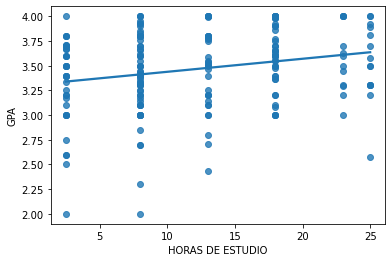

In [ ]:
sb.regplot(x = "HORAS DE ESTUDIO", 
            y = "GPA",  
            ci = None, 
            data = df) 